In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
gdp_data_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv'

In [43]:
# reading table from the url
marvel = pd.read_csv(gdp_data_url)

In [44]:
# reading a sample of marvel DF
marvel.sample(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
9697,706055,Ape-Man (Earth-616),\/Ape-Man_(Earth-616),Secret Identity,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,2.0,Apr-97,1997.0
15843,13220,Jane Melville (Earth-616),\/Jane_Melville_(Earth-616),Secret Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,Apr-96,1996.0
1653,1269,Calypso Ezili (Earth-616),\/Calypso_Ezili_(Earth-616),Public Identity,Bad Characters,Brown Eyes,Black Hair,Female Characters,NaN,Deceased Characters,22.0,Oct-80,1980.0
15532,62353,Juliette D'Angelo (Earth-616),\/Juliette_D%27Angelo_(Earth-616),NaN,NaN,NaN,NaN,Female Characters,NaN,Living Characters,NaN,Dec-81,1981.0
6073,36082,Burning Snake (Earth-616),\/Burning_Snake_(Earth-616),NaN,NaN,NaN,NaN,NaN,NaN,Living Characters,4.0,May-76,1976.0


In [45]:
# converting all labels to lowercase and removing whitespace in between
marvel.columns = [col.lower() for col in marvel.columns.tolist()]
marvel.columns = [col.replace(' ', '_') for col in marvel.columns.tolist()]

In [46]:
# checking for presesnce of NaN's in all columns
marvel.isna().any()

page_id             False
name                False
urlslug             False
id                   True
align                True
eye                  True
hair                 True
sex                  True
gsm                  True
alive                True
appearances          True
first_appearance     True
year                 True
dtype: bool

In [47]:
# handling NaN's in object type columnns
marvel.loc[:,['id', 'align', 'eye', 'hair', 'sex', 'gsm', 'alive', 'first_appearance']] = marvel.loc[:,
            ['id', 'align', 'eye', 'hair', 'sex', 'gsm', 'alive', 'first_appearance']].fillna('Unknown')

In [48]:
# handling NaN's in float type column
marvel.loc[:,['appearances', 'year']] = marvel.fillna({'appearances': np.abs(np.mean(marvel.appearances)), 
                                                       'year': np.abs(np.mean(marvel.year))})

In [49]:
# checking for presesnce of NaN's in all columns
marvel.isna().any()

page_id             False
name                False
urlslug             False
id                  False
align               False
eye                 False
hair                False
sex                 False
gsm                 False
alive               False
appearances         False
first_appearance    False
year                False
dtype: bool

In [50]:
# reading a sample of marvel DF
marvel.sample(5)

,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first_appearance,year
6819,341464,Ahmed Noor (Earth-616),\/Ahmed_Noor_(Earth-616),Secret Identity,Good Characters,Brown Eyes,Black Hair,Male Characters,Unknown,Living Characters,4.0,Aug-10,2010.0
2730,19664,Flexo (Earth-616),\/Flexo_(Earth-616),Secret Identity,Good Characters,Black Eyes,No Hair,Unknown,Unknown,Deceased Characters,12.0,Mar-40,1940.0
14782,300930,Karl (Earth-616),\/Karl_(Earth-616),No Dual Identity,Bad Characters,Blue Eyes,Brown Hair,Male Characters,Unknown,Living Characters,1.0,Jan-10,2010.0
2563,1687,Yuri Topolov (Earth-616),\/Yuri_Topolov_(Earth-616),Secret Identity,Neutral Characters,Blue Eyes,Bald,Male Characters,Unknown,Deceased Characters,13.0,May-62,1962.0
4021,704492,Ben Yarby (Shotgun City) (Earth-616),\/Ben_Yarby_(Shotgun_City)_(Earth-616),No Dual Identity,Good Characters,Unknown,Brown Hair,Male Characters,Unknown,Living Characters,7.0,Sep-56,1956.0


Text(0.5, 1.0, 'Gender Distribution')

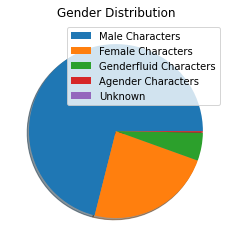

In [51]:
# gender distribution in MCU
marvel.sex.value_counts()
_ = plt.pie(marvel.sex.value_counts(), shadow=True)
_ = plt.legend(marvel.sex.unique())
plt.title('Gender Distribution')

In [52]:
# gender-wise number of appearances
gender_appear = np.round(marvel.groupby('sex').appearances.sum())
gender_appear

sex
Agender Characters           877.0
Female Characters          77059.0
Genderfluid Characters       565.0
Male Characters           195189.0
Unknown                     5249.0
Name: appearances, dtype: float64

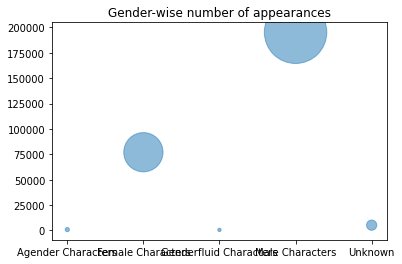

In [53]:
_ = plt.scatter(gender_appear.index, gender_appear, s=gender_appear/50, alpha=0.5)
_ = plt.title('Gender-wise number of appearances')

In [54]:
# gender-wise identity distribution
gender_id = marvel.groupby('sex').id.value_counts()
gender_id.name = 'count'
gender_id = gender_id.reset_index()
gender_id = gender_id.pivot(index='sex', columns= 'id', values='count')
gender_id

id,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity,Unknown
sex,,,,,
Agender Characters,1.0,11.0,5.0,14.0,14.0
Female Characters,5.0,486.0,1051.0,1505.0,790.0
Genderfluid Characters,NaN,1.0,NaN,1.0,NaN
Male Characters,9.0,1246.0,3367.0,4506.0,2510.0
Unknown,NaN,44.0,105.0,249.0,456.0


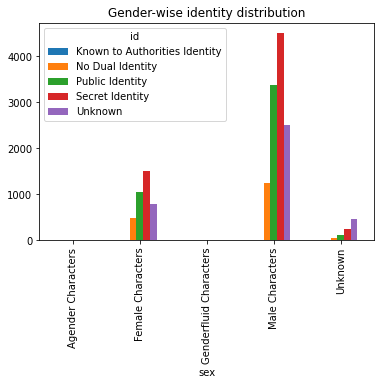

In [55]:
_ = gender_id.plot(kind='bar', title='Gender-wise identity distribution')